In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
df = pd.read_csv("C:\PyProjects\data\Stack Overflow Annual Developer Survey-2019/survey_results_public.csv", index_col="Respondent", usecols=["Respondent","MainBranch", "YearsCodePro"]).dropna(how="all")
df["YearsCodePro"] = df["YearsCodePro"].str.replace('Less than 1 year','1')
df["YearsCodePro"] = df["YearsCodePro"].str.replace('More than 50 years','51')
df["MainBranch"] = df["MainBranch"].astype("category")
df.head()

,MainBranch,YearsCodePro
Respondent,,
1,I am a student who is learning to code,NaN
2,I am a student who is learning to code,NaN
3,"I am not primarily a developer, but I write co...",1
4,I am a developer by profession,1
5,I am a developer by profession,9


In [3]:
df_1 = df["YearsCodePro"].dropna().astype("int64")
df_1.describe()

count    74331.000000
mean         8.210114
std          7.602403
min          1.000000
25%          3.000000
50%          6.000000
75%         11.000000
max         51.000000
Name: YearsCodePro, dtype: float64

In [4]:
filt = df["MainBranch"] == "I am a developer by profession"
# df_2 = df[filt]
df_2 = df[filt]["YearsCodePro"].dropna().astype("int64")
df_2.describe()

count    65109.000000
mean         8.130934
std          7.391816
min          1.000000
25%          3.000000
50%          6.000000
75%         11.000000
max         51.000000
Name: YearsCodePro, dtype: float64

In [5]:
df_1.agg([np.mean, np.std])

mean    8.210114
std     7.602403
Name: YearsCodePro, dtype: float64

<h1 style='color:red'>FUNCTIONS</h1>

In [6]:
def total_bar_graph_annotate(ax, n, bins, limit):
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(n, bin_centers):
        # Label the raw counts
        if count >= limit:
            ax.annotate('{:.0f}'.format(count), xy=(x, count),
                xytext=(0, 24), textcoords='offset points', va='center', ha='center', rotation="90", size=14, color="r")
        else:
            ax.annotate('{:.0f}'.format(count), xy=(x, count),
                xytext=(0, 24), textcoords='offset points', va='center', ha='center', rotation="90", size=14)   

def hist_color(n, patches):
    fracs = n / n.max()
    norm = colors.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(norm(thisfrac))
        thispatch.set_facecolor(color)
        
def best_fit_line(sigma, mu, bins):
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins1 - mu))**2))
    ax2.plot(bins1, y, '--', color='#fc4f30', zorder=3)

    ax2.axvline(mu, color='#fc4f30', label='Age Median', linewidth=2, zorder=3)
    ax2.text(40, .27, f"$\mu={mu},\ \sigma={sigma}$", size=16, zorder=3)

<h1 style='color:red'>GRAPH-1</h1>

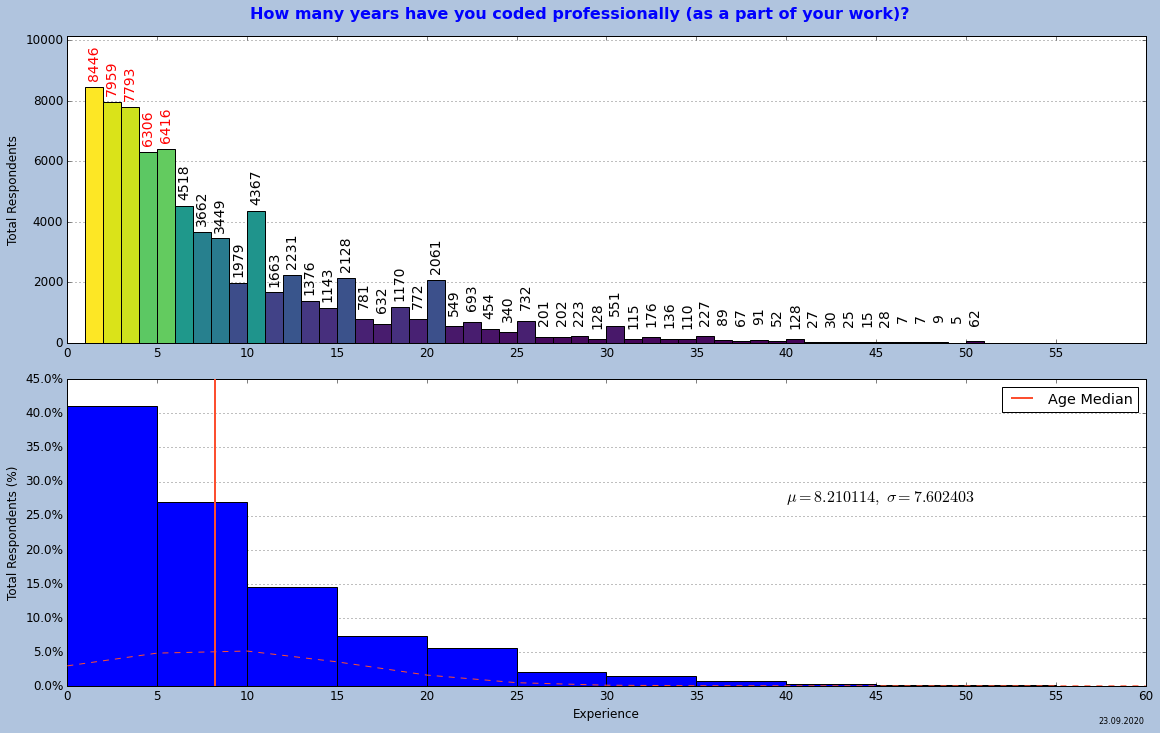

In [7]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(16,10), facecolor='lightsteelblue')
plt.figtext(0.99, 0.0, "23.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

widths = [1.8]
heights = [1, 1]
gs_kw = dict(height_ratios=heights)
gs = fig.add_gridspec(ncols=1, nrows=2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
######################
year = [x for x in df_1]
mu = 8.210114  # mean of distribution
sigma = 7.602403  # standard deviation of distribution
######################
# ax1 (top)
######################
n, bins, patches = ax1.hist(year, bins=50, density=0, zorder=3)

hist_color(n, patches) #------function
total_bar_graph_annotate(ax1, n, bins, 5000) #------function
#---------------------------------------------------------------#
ax1.set_xticks(range(0,60,5))
ax1.set_ylabel('Total Respondents')
ax1.grid(axis='y', zorder=0)
ax1.set_ylim([0, max(n)*1.2])
######################
# ax2 (bottom)
######################
bins = [x for x in range(0,65,5)]
n1, bins1, patches1 = ax2.hist(year, bins=bins, weights=np.ones(len(year)) / len(year), density=0, zorder=3)

best_fit_line(sigma, mu, bins) #------function
#---------------------------------------------------------------#
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=1)) #------format the y-axis to display percentage
ax2.set_xticks(range(0,65,5))
ax2.legend()
ax2.grid(axis='y', zorder=0)
ax2.set_ylabel('Total Respondents (%)')
######################
plt.xlabel("Experience")
fig.suptitle("How many years have you coded professionally (as a part of your work)?", fontsize=16, color='b', weight='bold')
plt.show()

<h1 style='color:red'>GRAPH-2</h1>

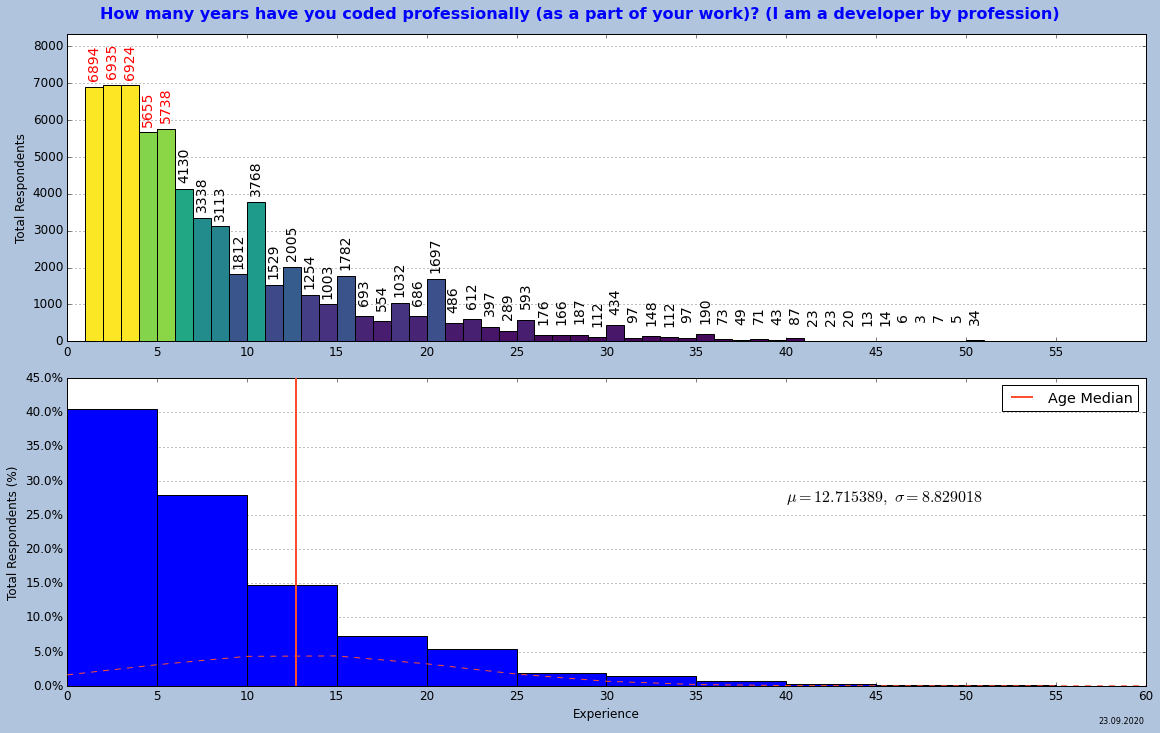

In [8]:
%matplotlib inline
fig = plt.figure(constrained_layout=True, figsize=(16,10), facecolor='lightsteelblue')
plt.figtext(0.99, 0.0, "23.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

widths = [1.8]
heights = [1, 1]
gs_kw = dict(height_ratios=heights)
gs = fig.add_gridspec(ncols=1, nrows=2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
######################
year_pro = [x for x in df_2]
mu = 12.715389  # mean of distribution
sigma = 8.829018  # standard deviation of distribution
######################
# ax1 (top)
######################
n, bins, patches = ax1.hist(year_pro, bins=50, density=0, zorder=3)

hist_color(n, patches) #------function
total_bar_graph_annotate(ax1, n, bins, 5000) #------function
#---------------------------------------------------------------#
ax1.set_xticks(range(0,60,5))
ax1.set_ylabel('Total Respondents')
ax1.grid(axis='y', zorder=0)
ax1.set_ylim([0, max(n)*1.2])
######################
# ax2 (bottom)
######################
bins = [x for x in range(0,65,5)]
n1, bins1, patches1 = ax2.hist(year_pro, bins=bins, weights=np.ones(len(year_pro)) / len(year_pro), density=0, zorder=3)

best_fit_line(sigma, mu, bins) #------function
#---------------------------------------------------------------#
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=1)) #------format the y-axis to display percentage
ax2.set_xticks(range(0,65,5))
ax2.legend()
ax2.grid(axis='y', zorder=0)
ax2.set_ylabel('Total Respondents (%)')
######################
plt.xlabel("Experience")
fig.suptitle("How many years have you coded professionally (as a part of your work)? (I am a developer by profession)", fontsize=16, color='b', weight='bold')
plt.show()